<center> <h1 style="background-color:black; color:white"><br>AIRBNB ANALYSIS
<br></h1></center>

`*Airbnb is a paid community platform for renting and booking private accommodation founded in 2008.Airbnb allows individuals to rent all or part of their own home as extra accommodation. 
The site offers a search and booking platform between the person offering their accommodation and 
the vacationer who wishes to rent it. It covers more than 1.5 million advertisements in more than
34,000 cities and 191 countries. From creation, inaugust 2008, until June 2012, more than
10 million nights have been booked on Airbnb.*`

## `Import Necessary Liberies :`

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set_theme(style='whitegrid')
import warnings
plt.style.use('fivethirtyeight')

## `Load the Dataset into Dataframe`

In [5]:
# Read the file from dataset. 
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
# print last 5 rows of dataframe
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [23]:
## Check the data shape of df
df.shape

(48895, 16)

In [24]:
# Check the features from the df
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
# Check the Data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
# Check the missing Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [27]:
## Just Seprate the null values only
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("============================================================")
        print(f"{column} ==> Missing values :{df[column].isnull().sum()},dtypes :{df[column].dtypes}")      

name ==> Missing values :16,dtypes :object
host_name ==> Missing values :21,dtypes :object
last_review ==> Missing values :10052,dtypes :object
reviews_per_month ==> Missing values :10052,dtypes :float64


## *For data cleaning* :
`or the float dtypes we are going to fill the missing values by mean(), 
for object we are going to fill missing values by mode().last_review is a date, so we need to convert it, then fill missing values from previous values.`

In [28]:
df['last_review']=pd.to_datetime(df.last_review)
df.last_review.isnull().sum()

10052

In [29]:
df["reviews_per_month"]=df["reviews_per_month"].fillna(df['reviews_per_month'].mean())
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant     40.68   
48891        Marisol            Brooklyn            Bushwick     40.70   
48892  Ilgar & Aysel           Manhattan              Harlem     40.81   
48893            Taz           Manhattan      Hell's Kitchen     40.76   
48894     Christophe           Manhattan      Hell's Kitchen     40.76   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890     -73.95     Private room     70               2                  0   
48891     -73.93     Private room     40               4                  0   
48892     -73.95  Entire home/apt    115              10                  0   
48893     -73.99      Shared room     55               1                  0   
48894     -73.99     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaT               1.37                               2   
48891         NaT               1.37                               2   
48892         NaT               1.37                               1   
48893         NaT               1.37                               6   
48894         NaT               1.37                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [30]:
df.last_review.fillna(method='ffill',inplace= True)

In [31]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("================================================")
        print(f"{column}==> Missing Values :{df[column].isnull().sum()},dtypes :{df[column].dtypes}")

name==> Missing Values :16,dtypes :object
host_name==> Missing Values :21,dtypes :object


In [32]:
for column in df.columns:
    if df[column].isnull().sum() !=0:
        df[column]=df[column].fillna(df[column].mode()[0])

In [33]:
# Check null values from datasets
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [34]:
# Check Statastical descriptive analysis of features
pd.options.display.float_format='{:.2f}'.format
df.describe()

id      host_id  latitude  longitude    price  minimum_nights  \
count    48895.00     48895.00  48895.00   48895.00 48895.00        48895.00   
mean  19017143.24  67620010.65     40.73     -73.95   152.72            7.03   
std   10983108.39  78610967.03      0.05       0.05   240.15           20.51   
min       2539.00      2438.00     40.50     -74.24     0.00            1.00   
25%    9471945.00   7822033.00     40.69     -73.98    69.00            1.00   
50%   19677284.00  30793816.00     40.72     -73.96   106.00            3.00   
75%   29152178.50 107434423.00     40.76     -73.94   175.00            5.00   
max   36487245.00 274321313.00     40.91     -73.71 10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           48895.00                        48895.00   
mean               23.27               1.37                            7.14   
std                44.55               1.50                           32.95   
min                 0.00               0.01                            1.00   
25%                 1.00               0.28                            1.00   
50%                 5.00               1.22                            1.00   
75%                24.00               1.58                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

In [35]:
## Print the unique values from dataset
categorical_col =[]
for column in df.columns:
    if len(df[column].unique())<=10:
        print("===============================================================================")
        print(f"{column} :{df[column].unique()}")
        categorical_col.append(column)

neighbourhood_group :['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type :['Private room' 'Entire home/apt' 'Shared room']


In [36]:
# drop Id,host_name feature because it is insignificant 
df.drop(['id','host_name'],axis='columns',inplace=True)
df.head(100)

name  host_id  \
0                 Clean & quiet apt home by the park     2787   
1                              Skylit Midtown Castle     2845   
2                THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                    Cozy Entire Floor of Brownstone     4869   
4   Entire Apt: Spacious Studio/Loft by central park     7192   
..                                               ...      ...   
95                    Sunny Apartment in Artist Home    44145   
96                Light-filled classic Central Park     42032   
97                         Upper Manhattan, New York    82685   
98                       COZY QUIET room 4 DOOGLERS!    83257   
99               The Stuydio Modern and Light Filled    87773   

   neighbourhood_group       neighbourhood  latitude  longitude  \
0             Brooklyn          Kensington     40.65     -73.97   
1            Manhattan             Midtown     40.75     -73.98   
2            Manhattan              Harlem     40.81     -73.94   
3             Brooklyn        Clinton Hill     40.69     -73.96   
4            Manhattan         East Harlem     40.80     -73.94   
..                 ...                 ...       ...        ...   
95            Brooklyn            Bushwick     40.70     -73.93   
96           Manhattan     Upper West Side     40.80     -73.96   
97           Manhattan              Harlem     40.83     -73.95   
98           Manhattan             Chelsea     40.74     -74.00   
99            Brooklyn  Bedford-Stuyvesant     40.68     -73.92   

          room_type  price  minimum_nights  number_of_reviews last_review  \
0      Private room    149               1                  9  2018-10-19   
1   Entire home/apt    225               1                 45  2019-05-21   
2      Private room    150               3                  0  2019-05-21   
3   Entire home/apt     89               1                270  2019-07-05   
4   Entire home/apt     80              10                  9  2018-11-19   
..              ...    ...             ...                ...         ...   
95  Entire home/apt    105               3                118  2019-06-18   
96  Entire home/apt    140               3                 81  2019-07-07   
97     Private room     89               1                  1  2018-10-09   
98     Private room     98              30                 30  2019-05-01   
99  Entire home/apt    125               7                139  2018-10-28   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                1.37                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
..                ...                             ...               ...  
95               1.05                               2                 9  
96               0.71                               1               198  
97               0.11                               1               365  
98               0.27                               2               364  
99               1.23                               2               311  

[100 rows x 14 columns]

In [37]:
df.isna().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [38]:
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## `Data Visualization`

array([[<AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'last_review'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

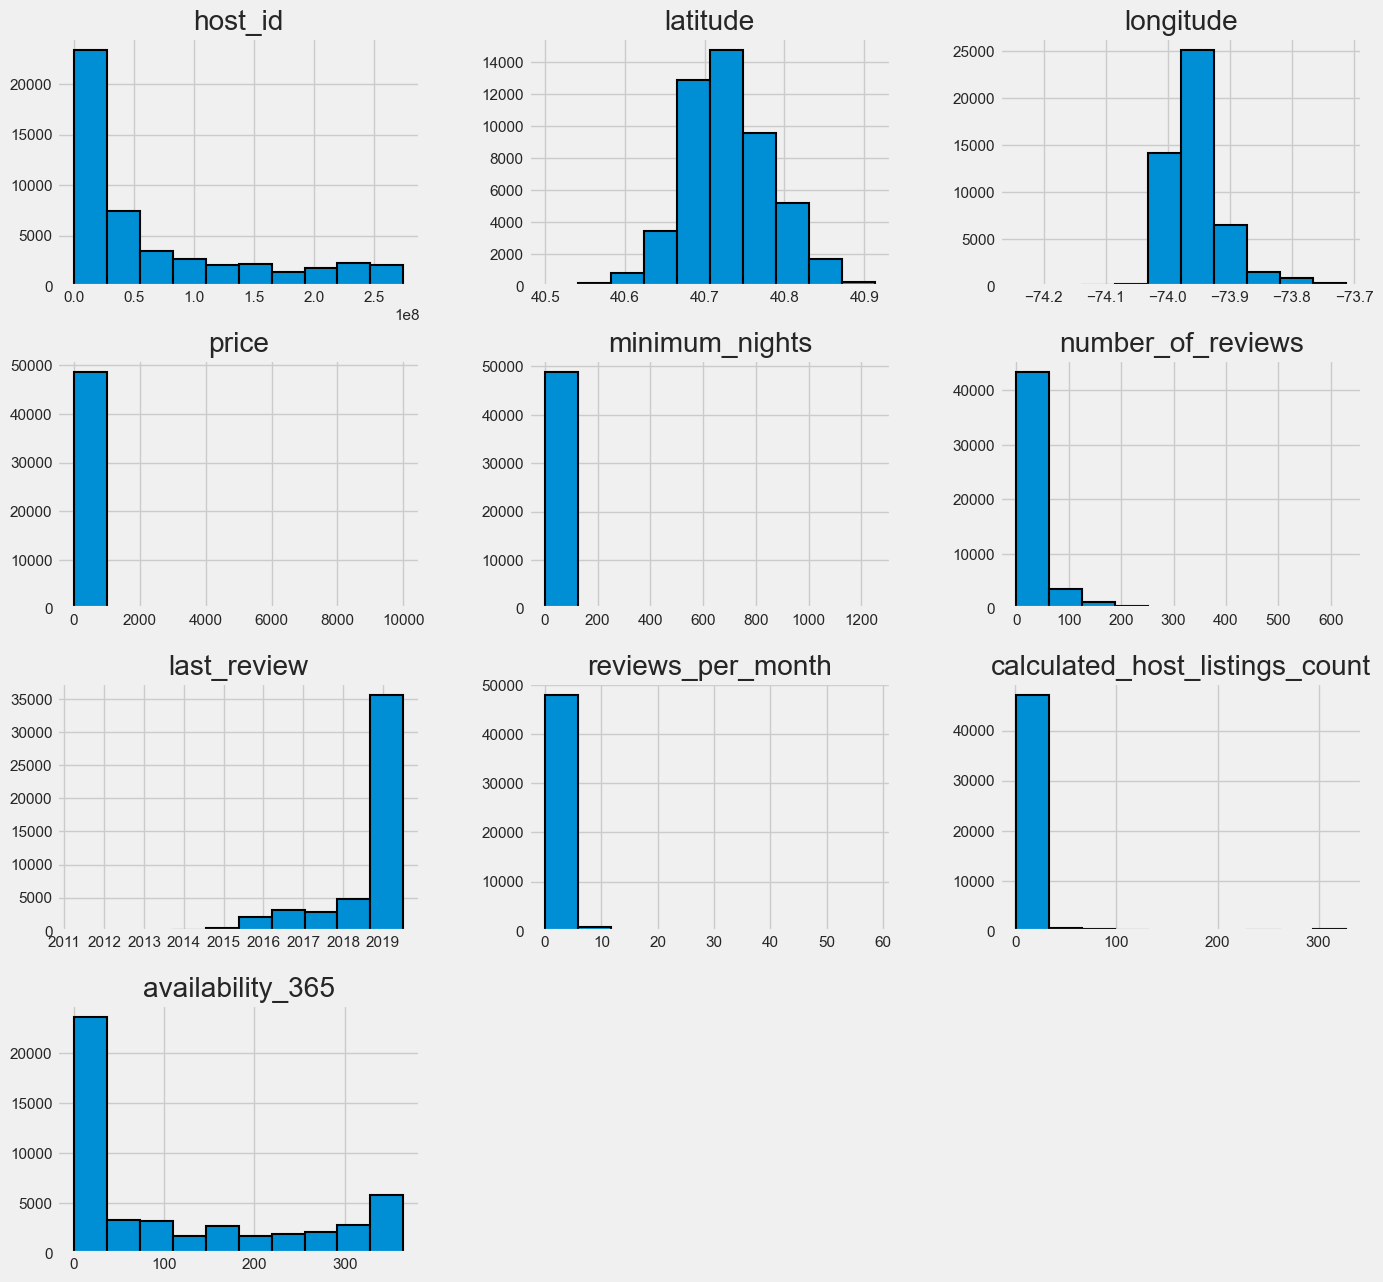

In [45]:
# Visualize distrubuation of every features
df.hist(edgecolor='black',linewidth=1.5,figsize=(15,15))

<Figure size 1000x1000 with 0 Axes>

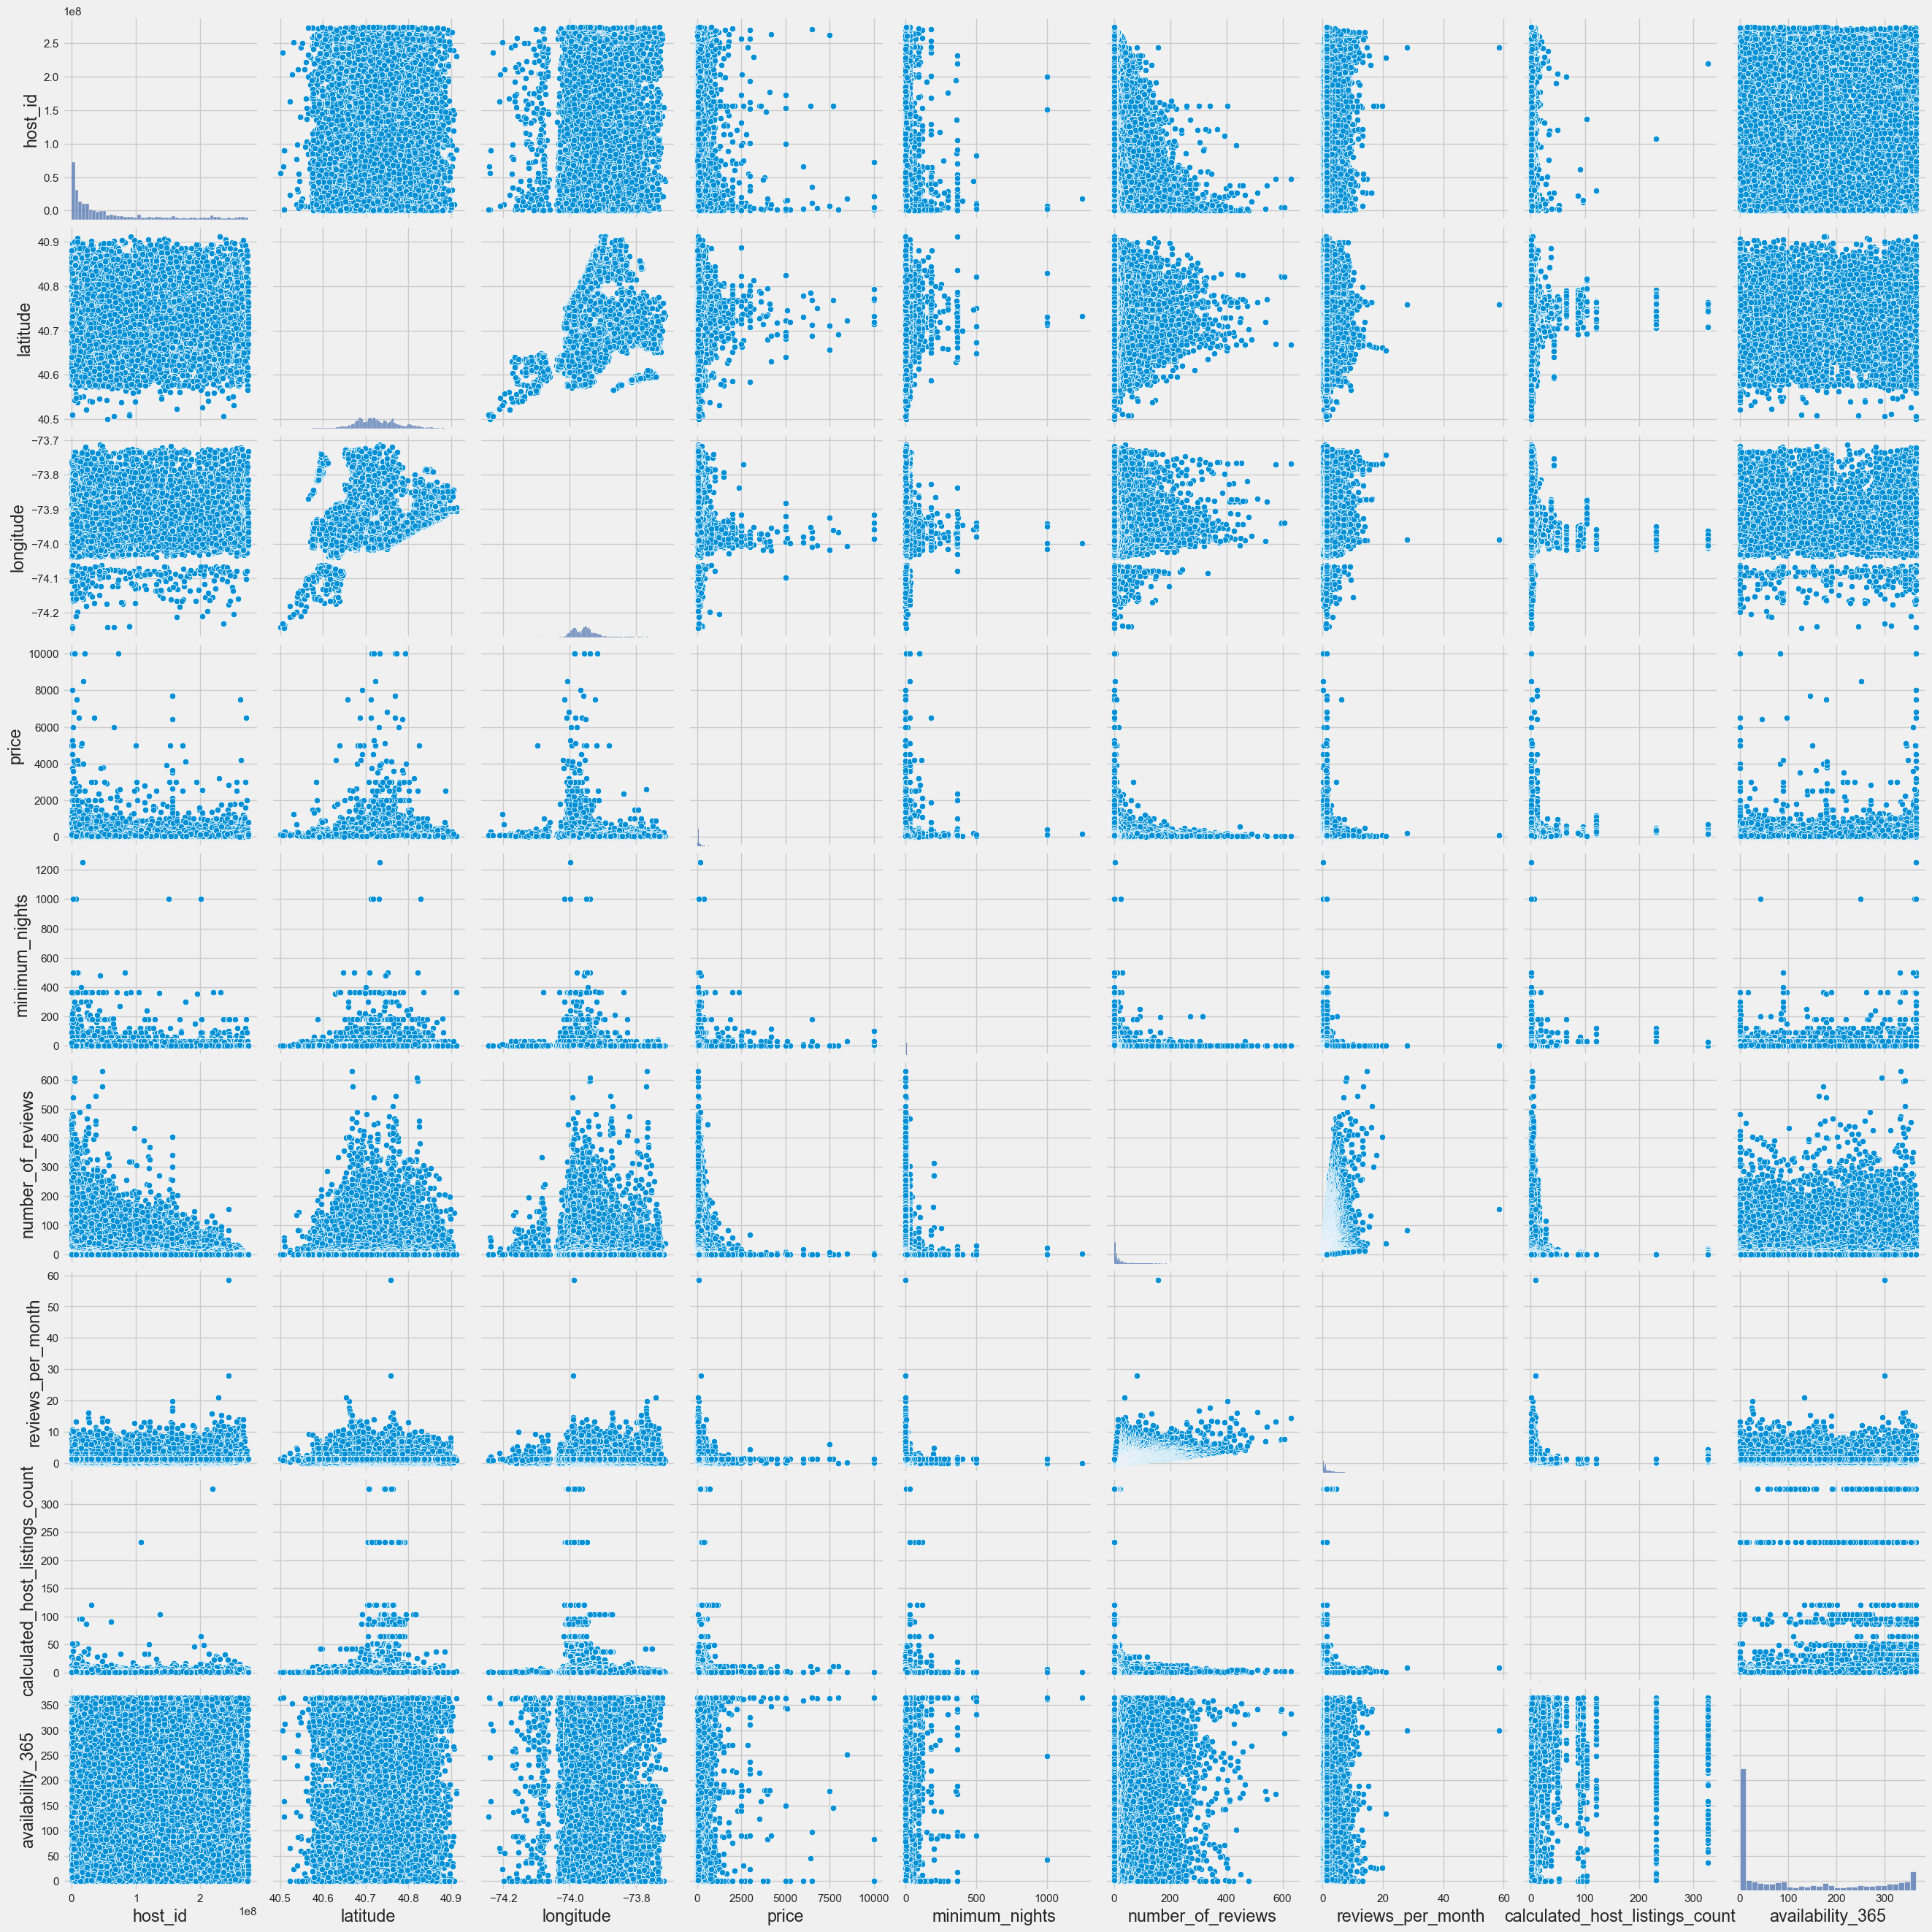

In [50]:
plt.figure(figsize=(10,10))
sns.pairplot(df, height=3, diag_kind="hist")

`We notice from the graphs that :`

`1. latitude and longitude have a normal distribution, most of the hosts are concetrated in specific area.`

`2. reviews_per_month has a lot of outlayers, because of the missing values filled by mean() and mode()`

`3. availability_365 the most of the hosts are not available all the year.`

`4. price most the host has a price under $1000`

In [53]:
col =list(df.columns)
col.remove("latitude")
col.remove("longitude")

In [58]:
col

['name',
 'host_id',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [60]:
categorical_col

['neighbourhood_group', 'room_type']

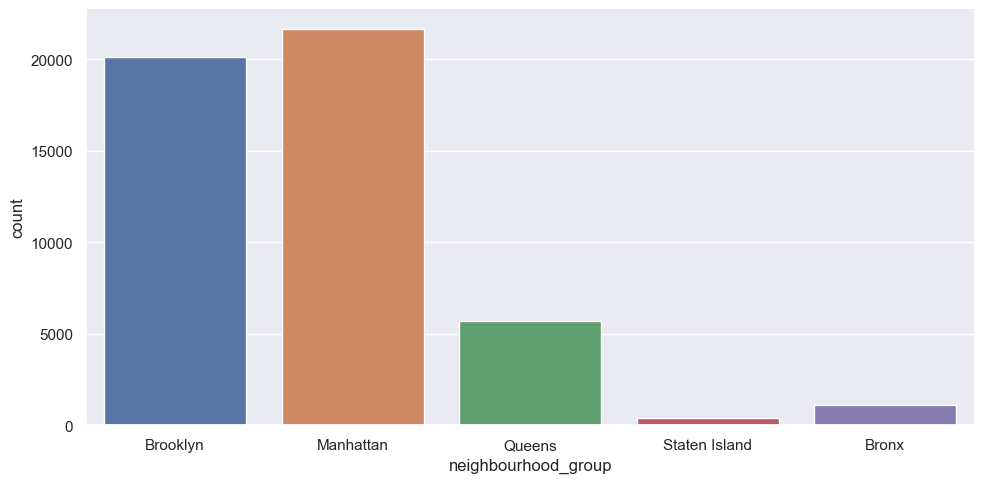

In [72]:
sns.set(font_scale =1.0)
sns.catplot(x='neighbourhood_group',
    data=df,
    kind='count',
    height=5,aspect=2)

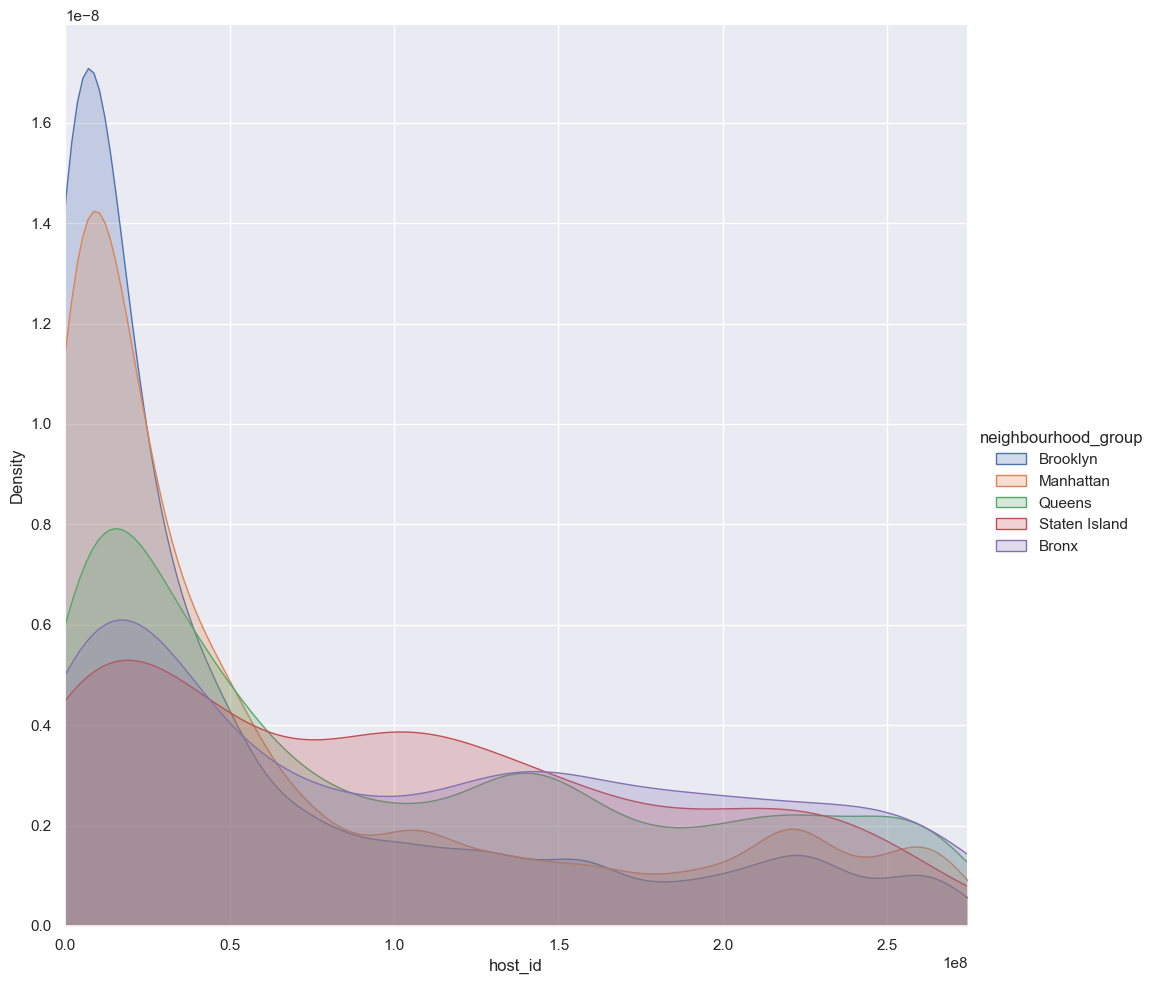

In [76]:
fig= sns.FacetGrid(data=df,hue='neighbourhood_group',height=10,aspect=1)
fig.map(sns.kdeplot,'host_id',shade=True)
oldest =df['host_id'].max()
fig.set(xlim=(0,oldest))
sns.set(font_scale =1.)
fig.add_legend()

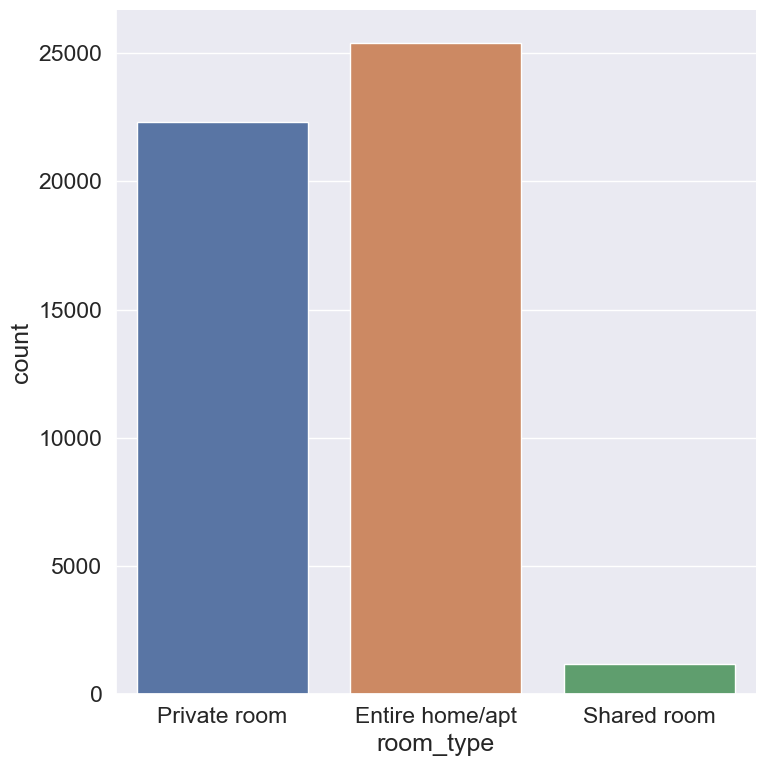

In [79]:
sns.set(font_scale=1.5)
sns.catplot(x='room_type',data=df,kind='count',height=8,)

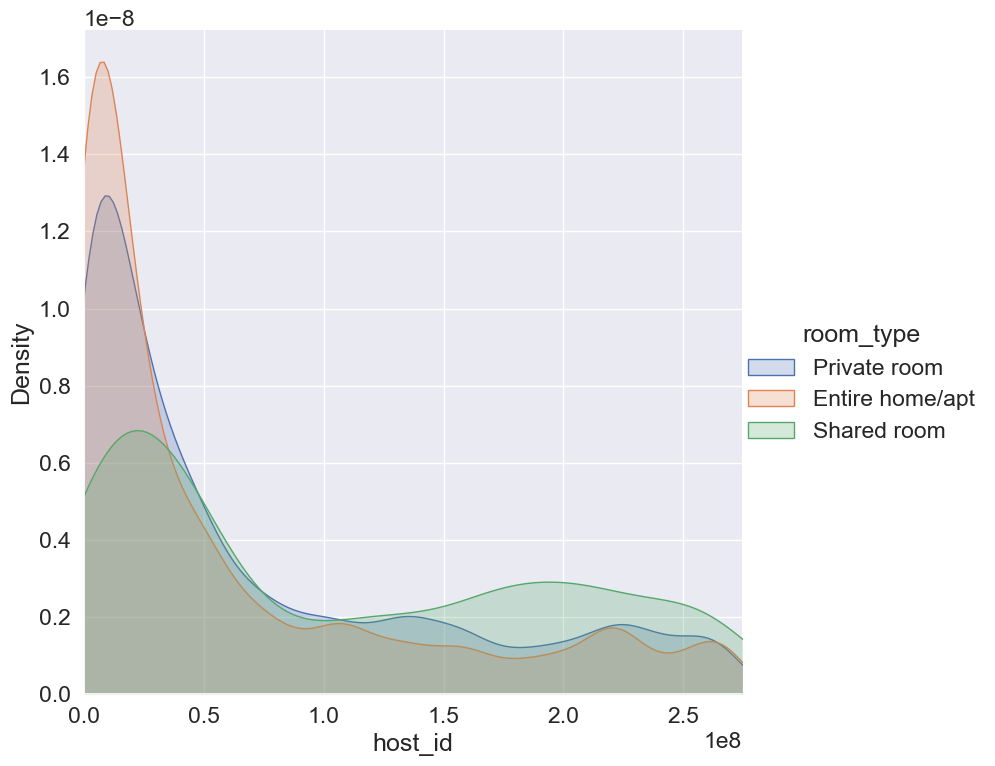

In [81]:
fig=sns.FacetGrid(data=df,hue='room_type',height=8,aspect=1)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest =df['host_id'].max()
fig.set(xlim=(0,oldest))
sns.set(font_scale=1.5)
fig.add_legend()

<AxesSubplot:>

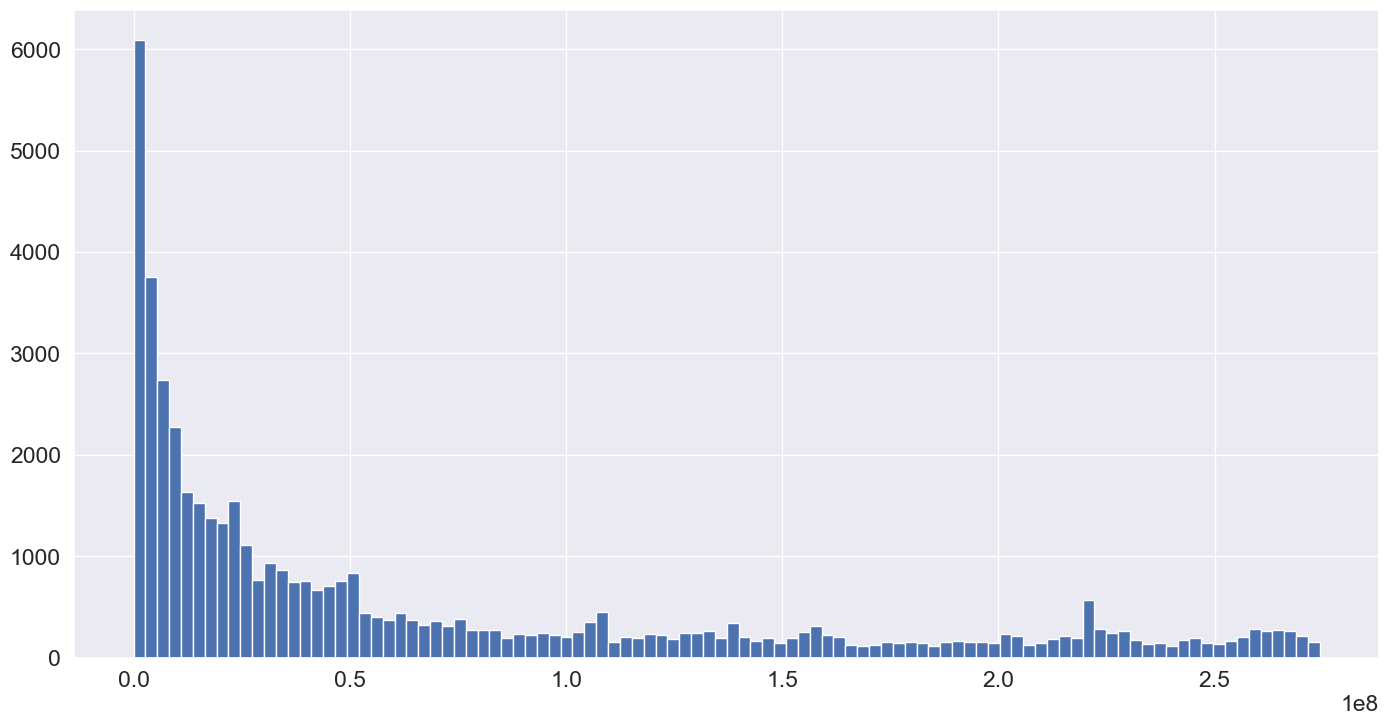

In [83]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
df.host_id.hist(bins=100)

Text(0, 0.5, 'Neighbourhood Area')

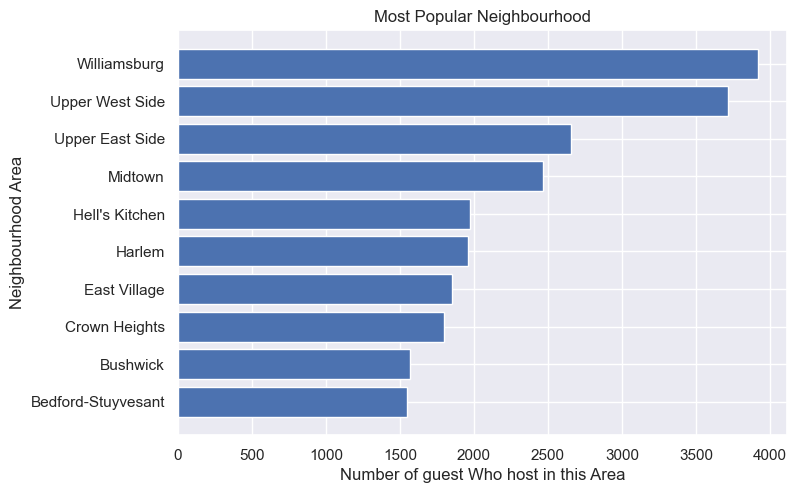

In [119]:
data=df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(7,5))
x=list(data.index)
y=list(data.values)
# x.reverse()
# y.reverse()
x.sort()
y.sort()
plt.barh(x,y)
plt.title('Most Popular Neighbourhood')
plt.xlabel('Number of guest Who host in this Area')
plt.ylabel('Neighbourhood Area')

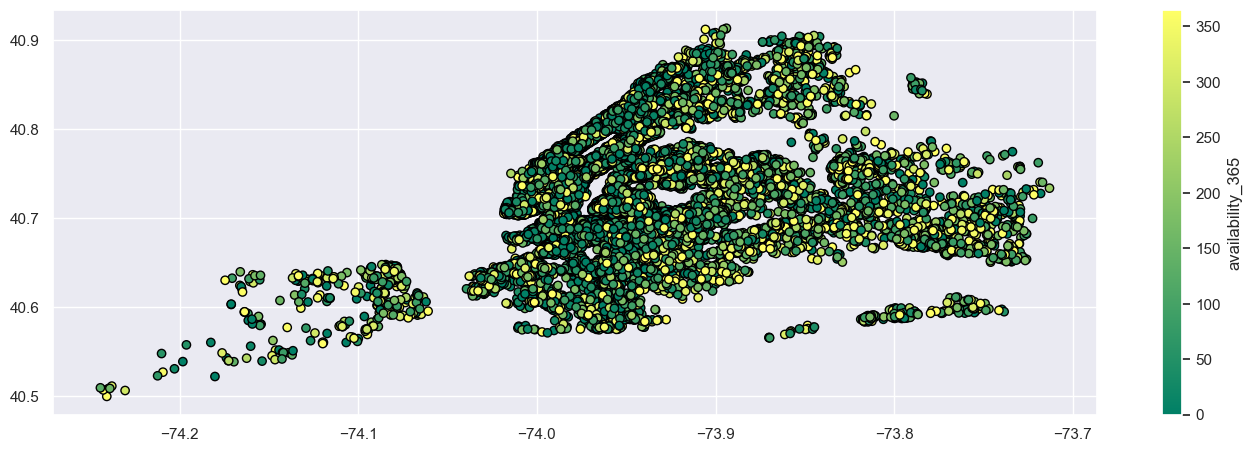

In [140]:
plt.figure(figsize=(15,5))
plt.scatter(x="longitude",y="latitude",
    s=None,
    c=df.availability_365,
    marker=None,
    cmap='summer',
    norm=None,
    vmin=None,
    vmax=None,
    alpha=1,
    linewidths=1,
    edgecolors='black',
    plotnonfinite=False,
    data=df)

cbar=plt.colorbar()
cbar.set_label('availability_365')

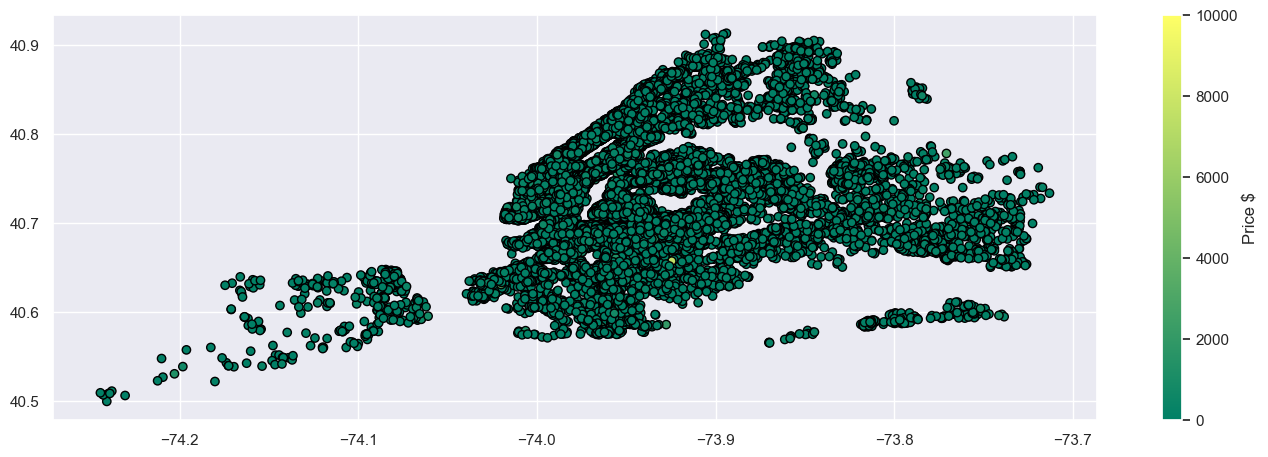

In [146]:
plt.figure(figsize=(15,5))
plt.scatter(x='longitude',y='latitude',
    s=None,
    c=df.price,
    marker=None,
    cmap='summer',
    norm=None,
    vmin=None,
    vmax=None,
    alpha=1,
    linewidths=1,
    edgecolors="black",
    plotnonfinite=False,
    data=df)

cbar=plt.colorbar()
cbar.set_label('Price $')

In [151]:
print(f"Avarage price per night :$ {df.price.mean():.2f}")
print(f"Maximum Price per night :$ {df.price.max():.2f}")
print(f"Minimum Price per night :$ {df.price.min():.2f}")

Avarage price per night :$ 152.72
Maximum Price per night :$ 10000.00
Minimum Price per night :$ 0.00


In [152]:
df[df['price']==0]

name    host_id  \
23161  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753                    Sunny, Quiet Room in Greenpoint    1641537   
25778      Modern apartment in the heart of Williamsburg   10132166   
25794  Spacious comfortable master bedroom with nice ...   86327101   
25795  Contemporary bedroom in brownstone with nice view   86327101   
25796       Cozy yet spacious private brownstone bedroom   86327101   
26259                              the best you can find   13709292   
26841  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866             Best Coliving space ever! Shared room.  101970559   

      neighbourhood_group       neighbourhood  latitude  longitude  \
23161            Brooklyn  Bedford-Stuyvesant     40.69     -73.95   
25433               Bronx     East Morrisania     40.83     -73.89   
25634            Brooklyn            Bushwick     40.69     -73.92   
25753            Brooklyn          Greenpoint     40.72     -73.94   
25778            Brooklyn        Williamsburg     40.71     -73.95   
25794            Brooklyn  Bedford-Stuyvesant     40.68     -73.91   
25795            Brooklyn  Bedford-Stuyvesant     40.68     -73.91   
25796            Brooklyn  Bedford-Stuyvesant     40.68     -73.91   
26259           Manhattan         Murray Hill     40.75     -73.98   
26841            Brooklyn            Bushwick     40.69     -73.91   
26866            Brooklyn            Bushwick     40.69     -73.91   

             room_type  price  minimum_nights  number_of_reviews last_review  \
23161     Private room      0               4                  1  2018-01-06   
25433     Private room      0               2                 55  2019-06-24   
25634     Private room      0               2                 16  2019-05-18   
25753     Private room      0               2                 12  2017-10-27   
25778  Entire home/apt      0               5                  3  2018-01-02   
25794     Private room      0               1                 93  2019-06-15   
25795     Private room      0               1                 95  2019-06-21   
25796     Private room      0               1                 95  2019-06-23   
26259  Entire home/apt      0               3                  0  2019-06-23   
26841      Shared room      0              30                  2  2019-06-22   
26866      Shared room      0              30                  5  2019-05-24   

       reviews_per_month  calculated_host_listings_count  availability_365  
23161               0.05                               4                28  
25433               2.56                               4               127  
25634               0.71                               5                 0  
25753               0.53                               2                 0  
25778               0.15                               1                73  
25794               4.28                               6               176  
25795               4.37                               6               232  
25796               4.35                               6               222  
26259               1.37                               1                 0  
26841               0.11                               6               333  
26866               0.26                               6               139

<AxesSubplot:>

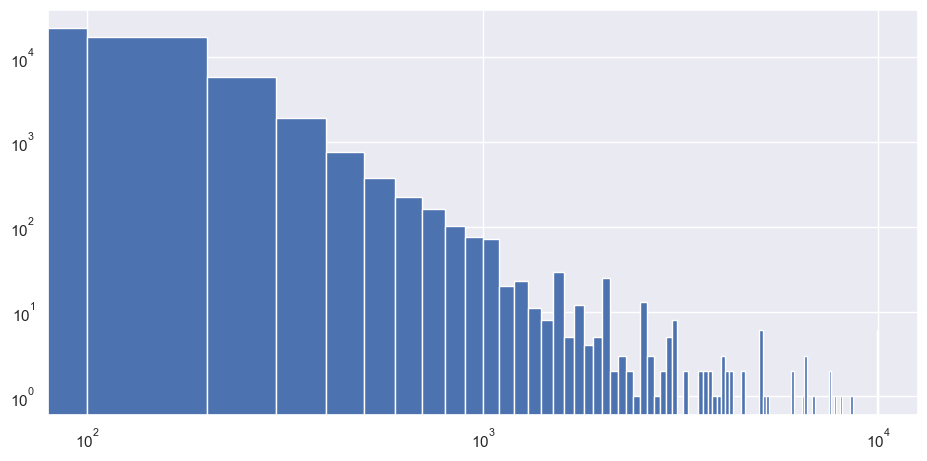

In [154]:
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.yscale('log')

df.price.hist(bins=100)

<AxesSubplot:>

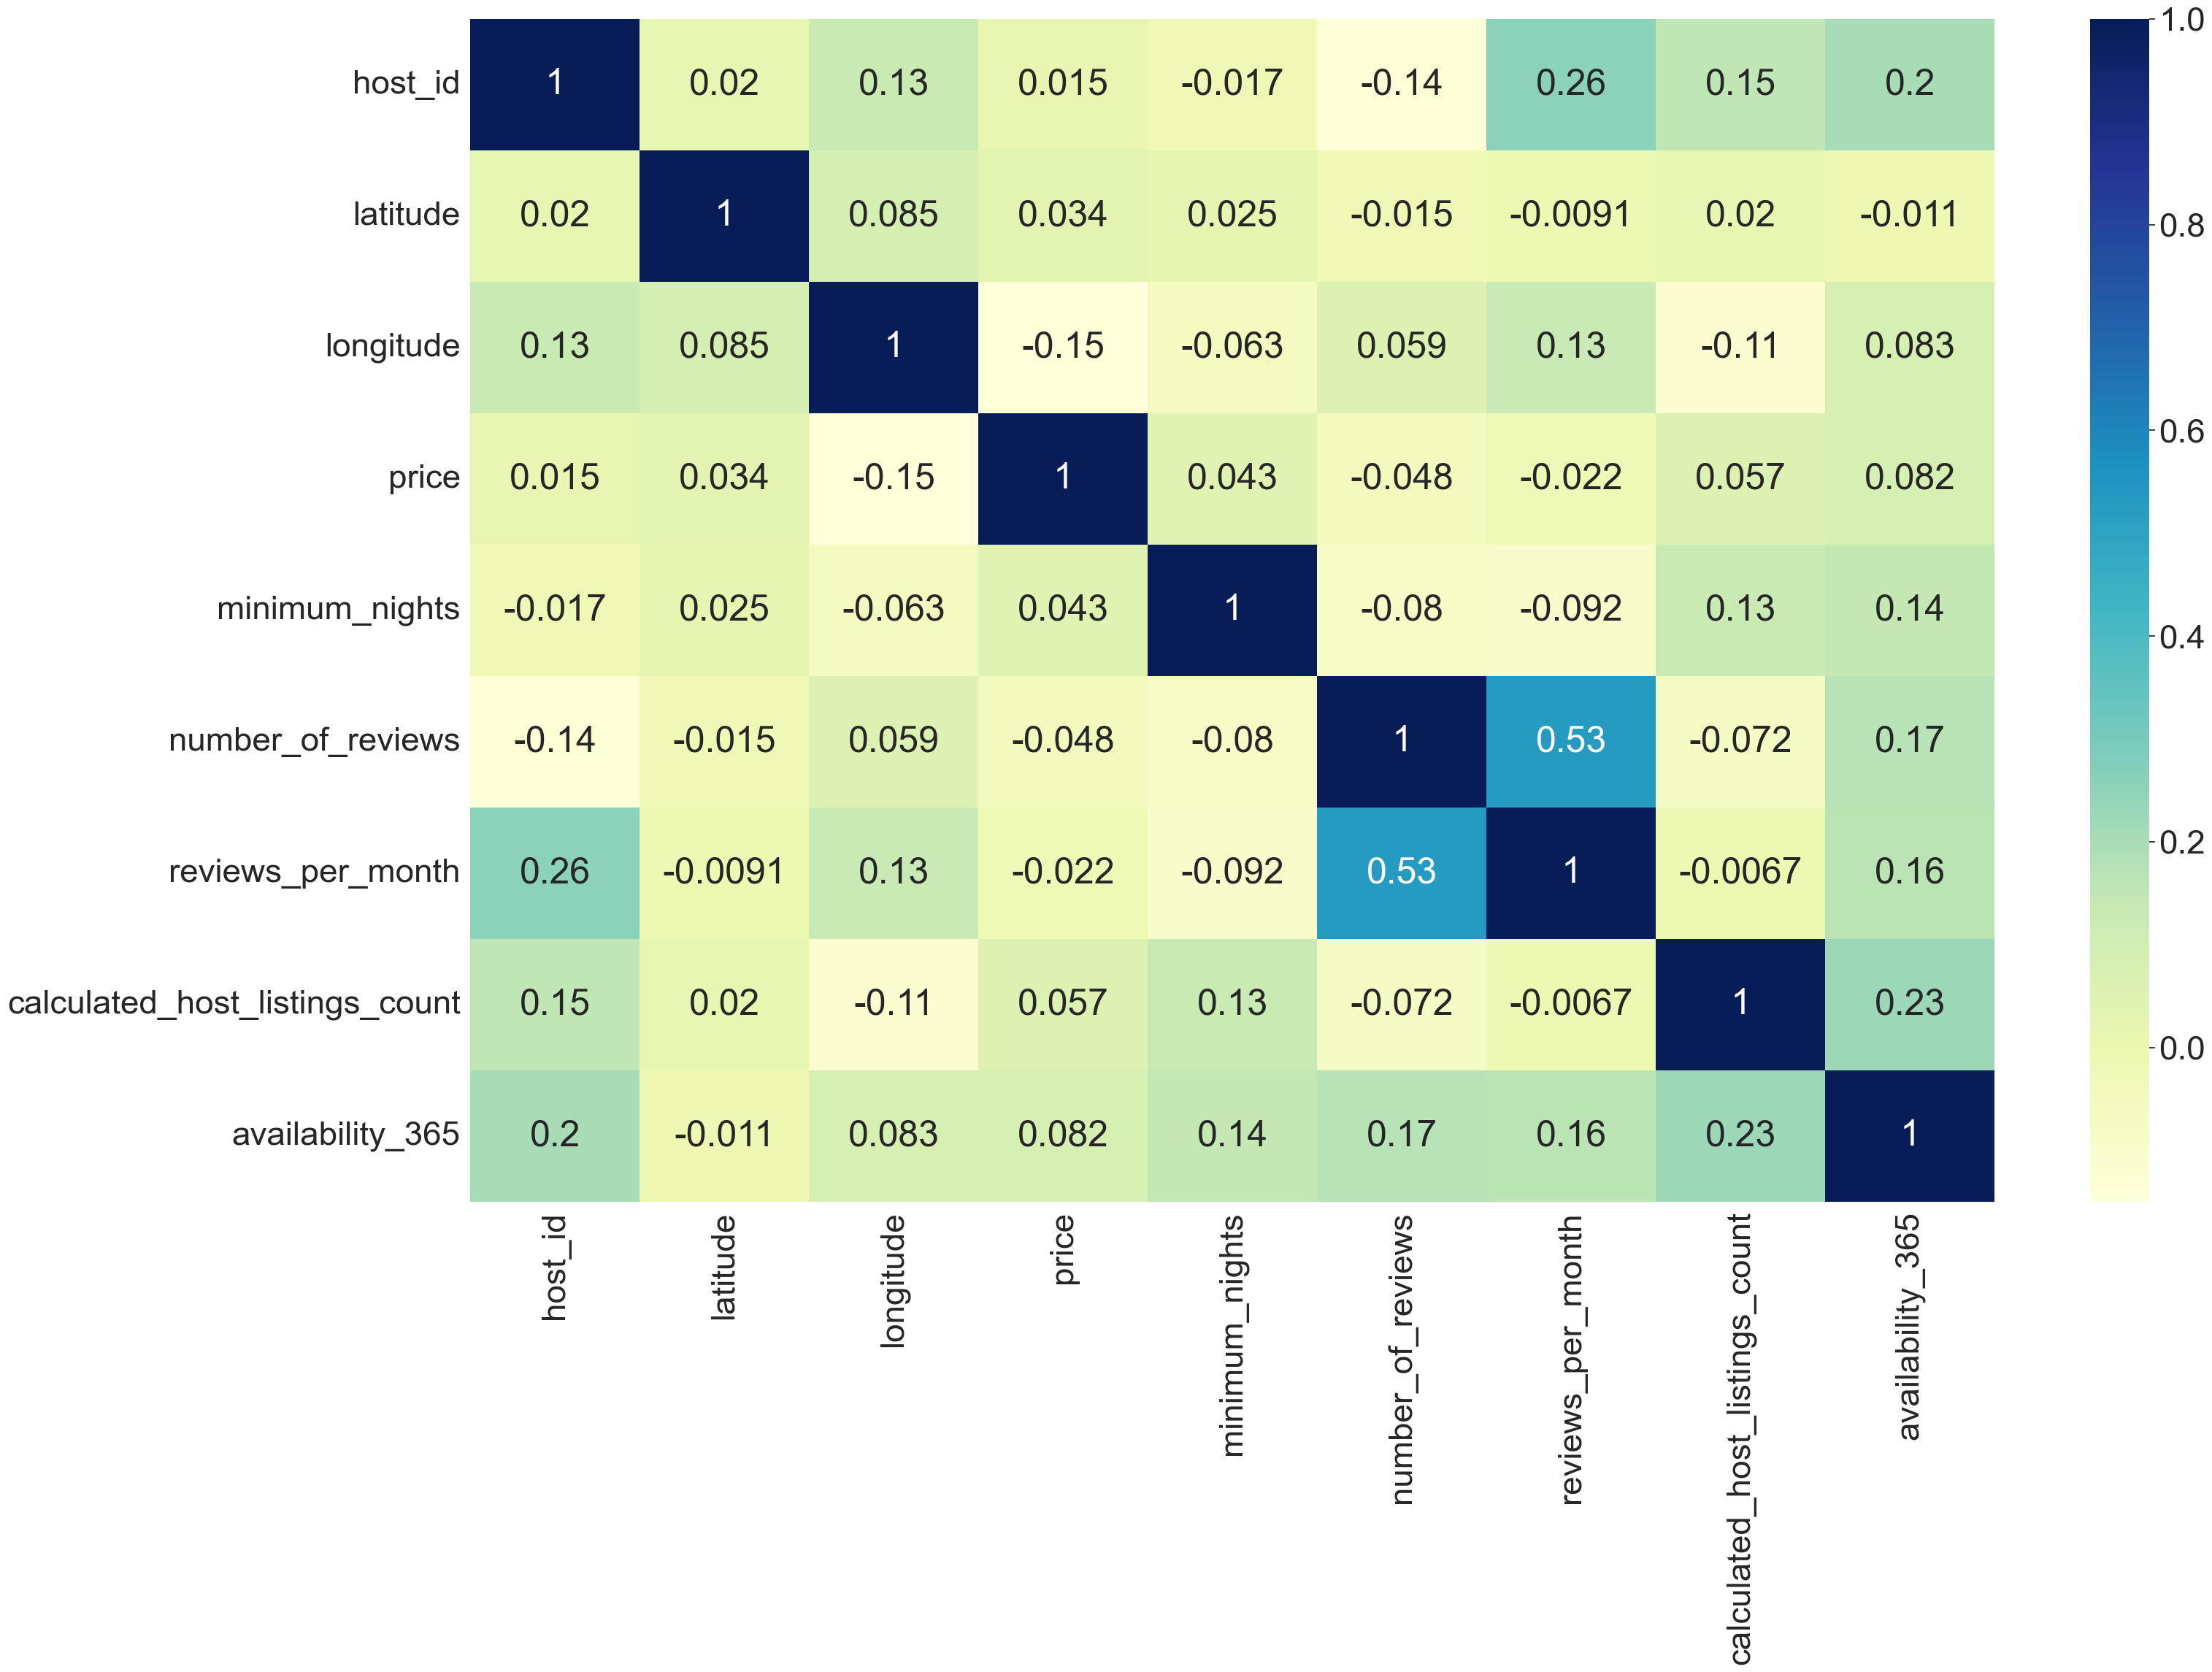

In [160]:
## Corelation Matrix
sns.set(font_scale=3)
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr(),
    vmin=None,
    vmax=None,
    cmap='YlGnBu',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None)

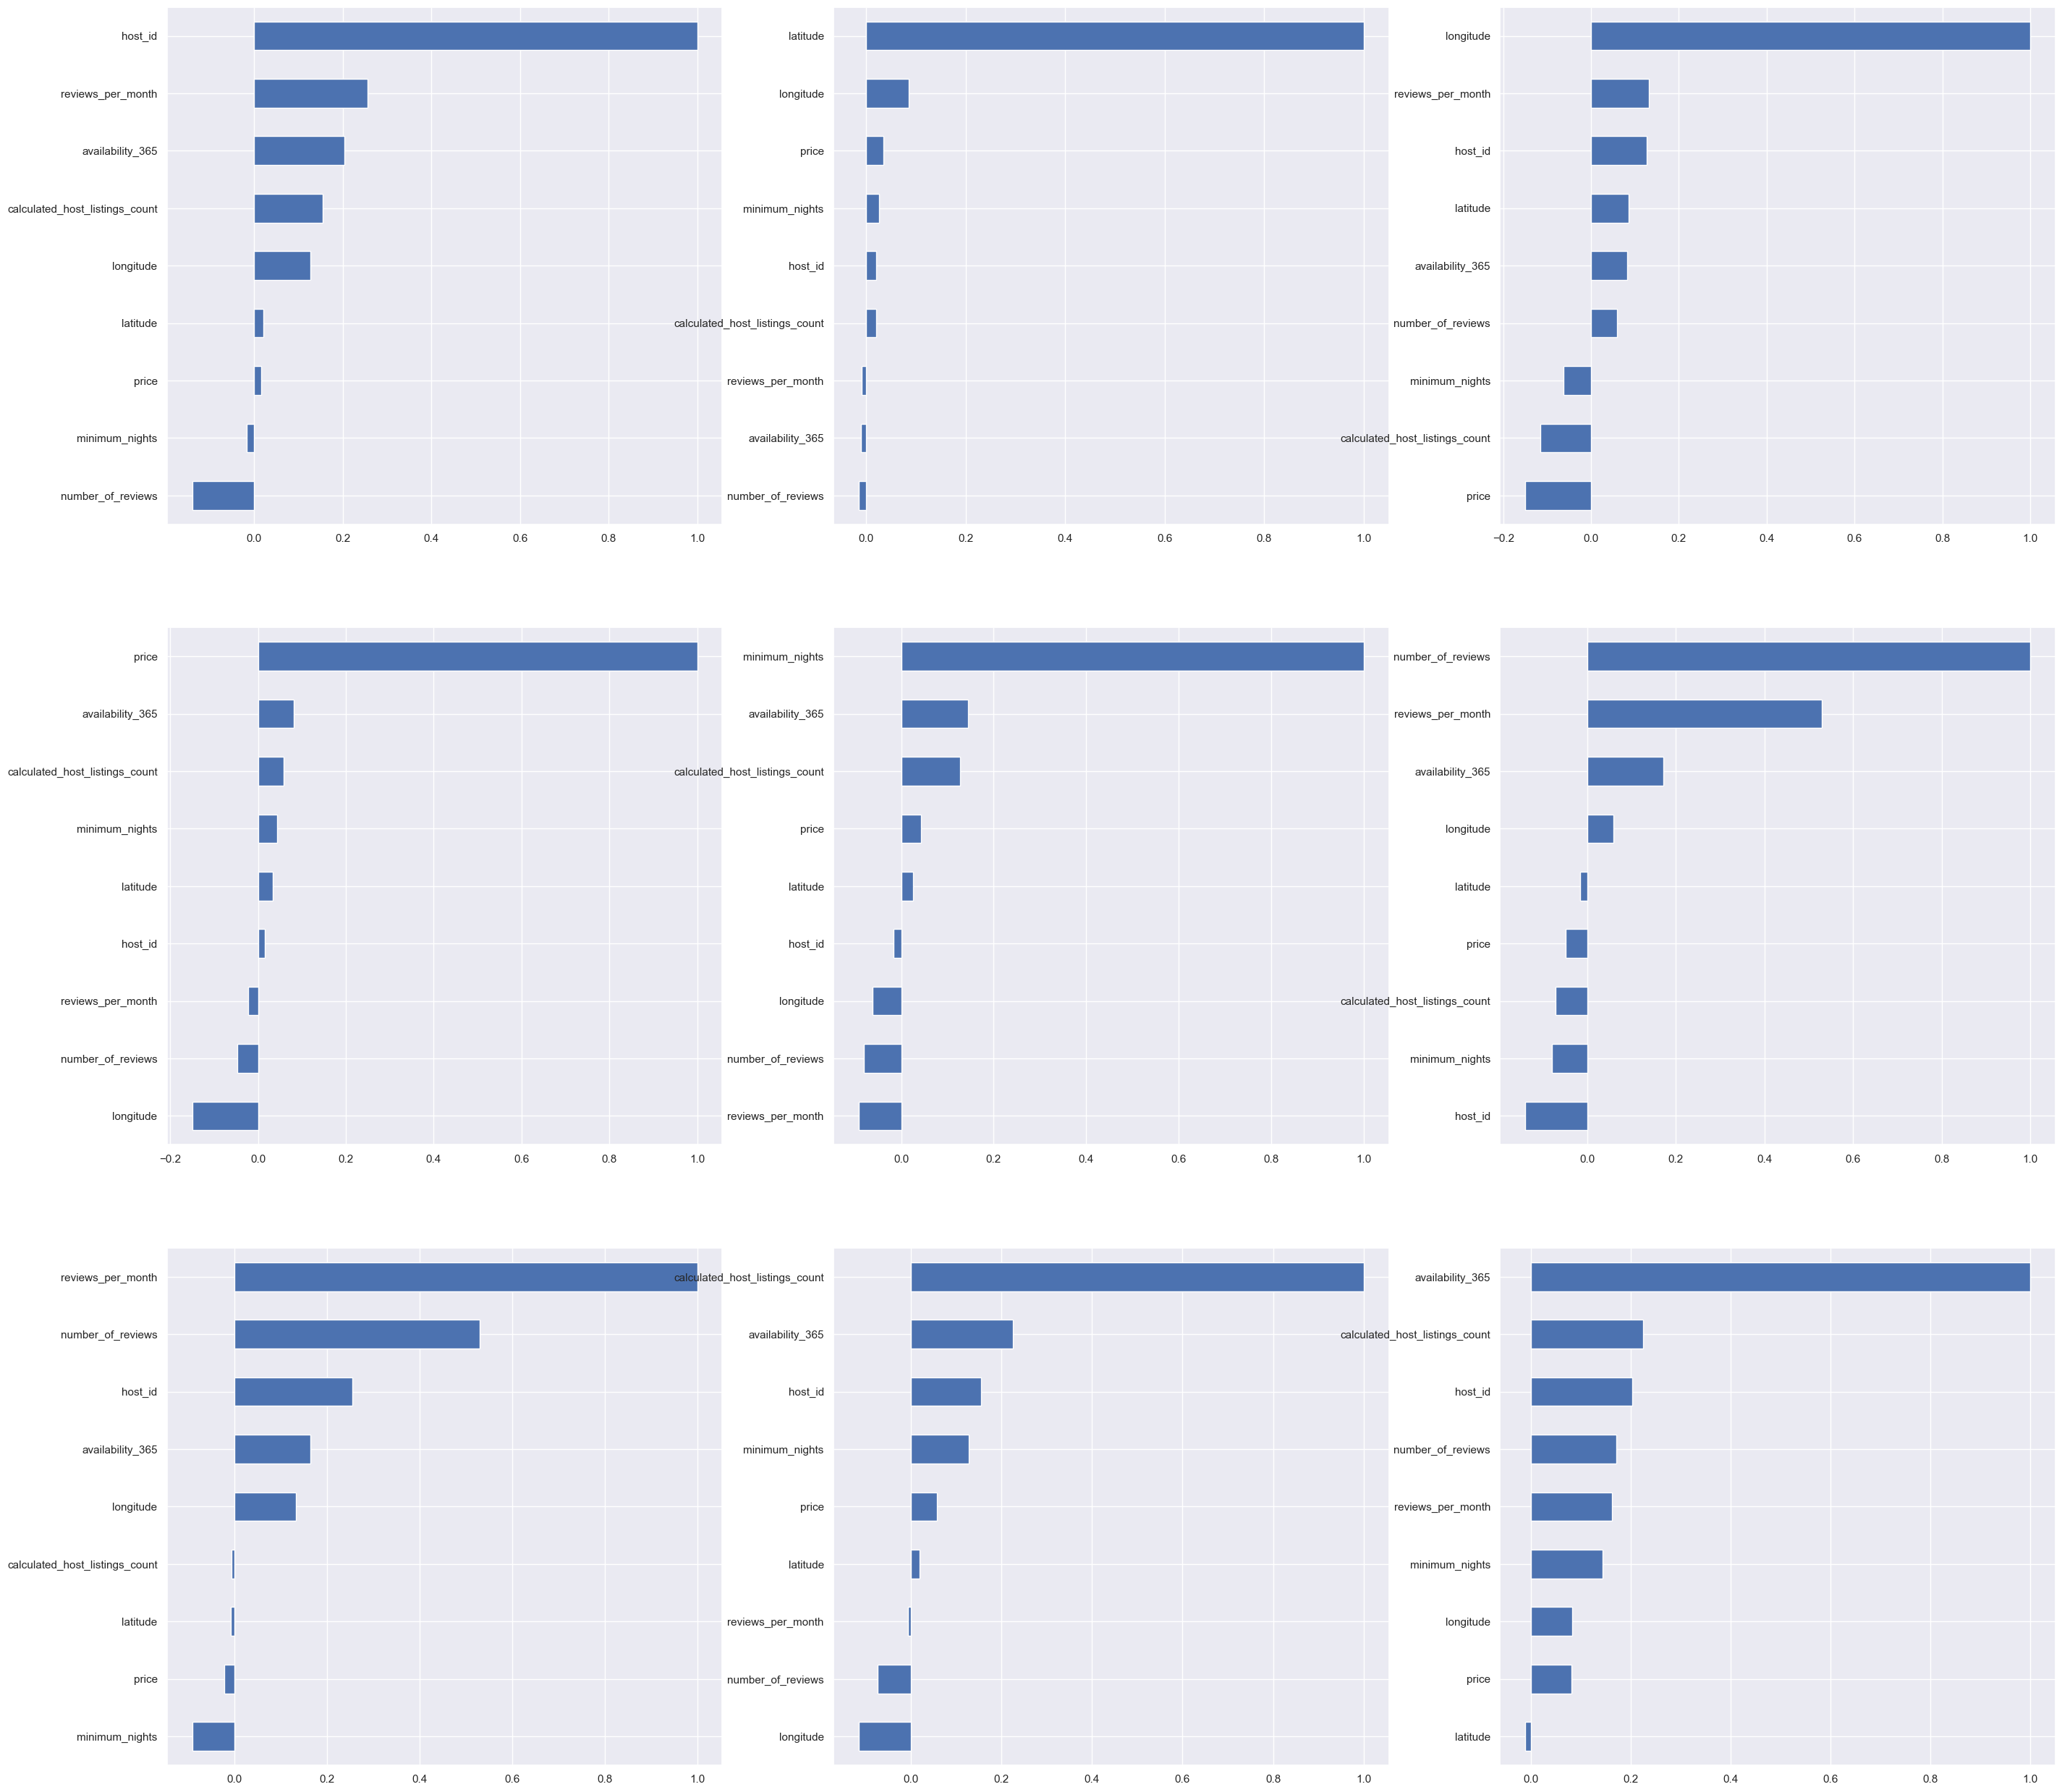

In [162]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.0)
i=1
for column in df.columns:
    if df[column].dtype =='float64' or df[column].dtype == 'int64':
        plt.subplot(3,3,i)
        df.corr()[column].sort_values().plot(kind="barh")
        i+=1

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

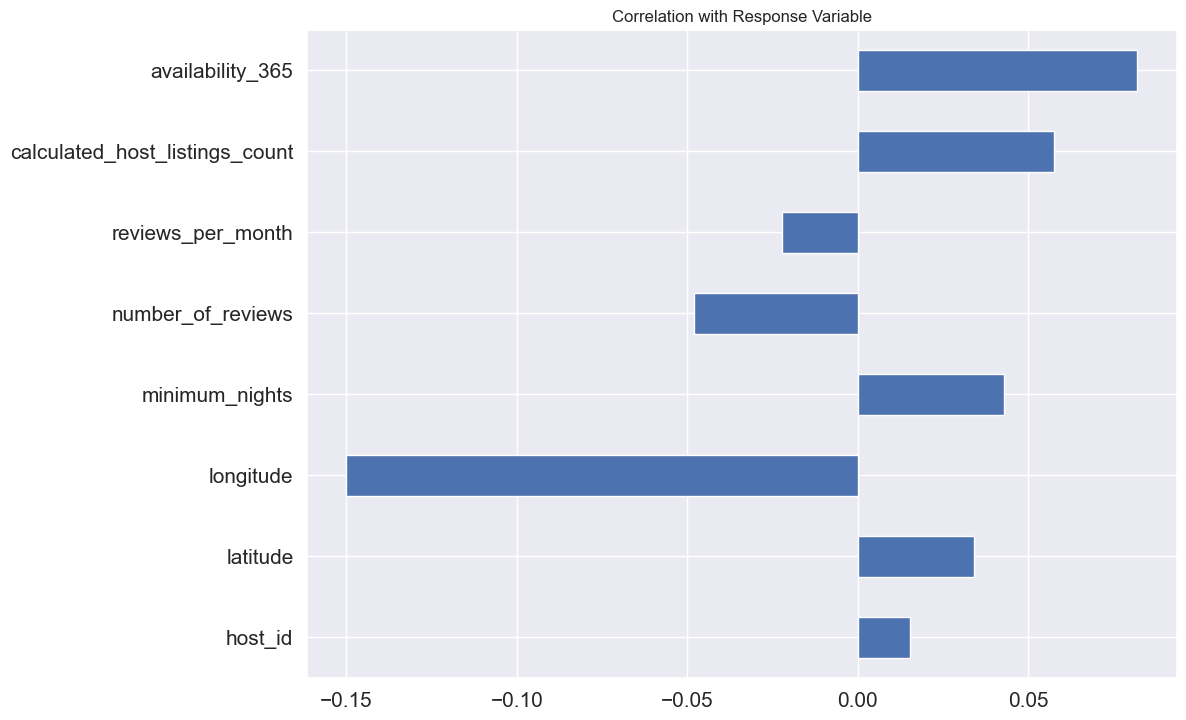

In [165]:
df.drop('price', axis=1).corrwith(df.price).plot.barh(figsize=(10, 8), 
title='Correlation with Response Variable',fontsize=15, grid=True)

## `Handle Categorical Features :`

In [168]:
print(categorical_col)

['neighbourhood_group', 'room_type']


In [169]:
datasets =pd.get_dummies(data=df,columns=categorical_col)

In [170]:
datasets

name   host_id  \
0                     Clean & quiet apt home by the park      2787   
1                                  Skylit Midtown Castle      2845   
2                    THE VILLAGE OF HARLEM....NEW YORK !      4632   
3                        Cozy Entire Floor of Brownstone      4869   
4       Entire Apt: Spacious Studio/Loft by central park      7192   
...                                                  ...       ...   
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

            neighbourhood  latitude  longitude  price  minimum_nights  \
0              Kensington     40.65     -73.97    149               1   
1                 Midtown     40.75     -73.98    225               1   
2                  Harlem     40.81     -73.94    150               3   
3            Clinton Hill     40.69     -73.96     89               1   
4             East Harlem     40.80     -73.94     80              10   
...                   ...       ...        ...    ...             ...   
48890  Bedford-Stuyvesant     40.68     -73.95     70               2   
48891            Bushwick     40.70     -73.93     40               4   
48892              Harlem     40.81     -73.95    115              10   
48893      Hell's Kitchen     40.76     -73.99     55               1   
48894      Hell's Kitchen     40.76     -73.99     90               7   

       number_of_reviews last_review  reviews_per_month  \
0                      9  2018-10-19               0.21   
1                     45  2019-05-21               0.38   
2                      0  2019-05-21               1.37   
3                    270  2019-07-05               4.64   
4                      9  2018-11-19               0.10   
...                  ...         ...                ...   
48890                  0  2019-07-08               1.37   
48891                  0  2019-07-08               1.37   
48892                  0  2019-07-08               1.37   
48893                  0  2019-07-08               1.37   
48894                  0  2019-07-08               1.37   

       calculated_host_listings_count  availability_365  \
0                                   6               365   
1                                   2               355   
2                                   1               365   
3                                   1               194   
4                                   1                 0   
...                               ...               ...   
48890                               2                 9   
48891                               2                36   
48892                               1                27   
48893                               6                 2   
48894                               1                23   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                              0                             1   
1                              0                             0   
2                              0                             0   
3                              0                             1   
4                              0                             0   
...                          ...                           ...   
48890                          0                             1   
48891                          0                             1   
48892                          0                             0   
48893                          0                             0   
48894                          0                             0   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                                  0                   

In [171]:
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [172]:
datasets.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [175]:
datasets.describe().loc["mean",:]

host_id                             67620010.65
latitude                                  40.73
longitude                                -73.95
price                                    152.72
minimum_nights                             7.03
number_of_reviews                         23.27
reviews_per_month                          1.37
calculated_host_listings_count             7.14
availability_365                         112.78
neighbourhood_group_Bronx                  0.02
neighbourhood_group_Brooklyn               0.41
neighbourhood_group_Manhattan              0.44
neighbourhood_group_Queens                 0.12
neighbourhood_group_Staten Island          0.01
room_type_Entire home/apt                  0.52
room_type_Private room                     0.46
room_type_Shared room                      0.02
Name: mean, dtype: float64

In [176]:
datasets.describe().loc["std",:]

host_id                             78610967.03
latitude                                   0.05
longitude                                  0.05
price                                    240.15
minimum_nights                            20.51
number_of_reviews                         44.55
reviews_per_month                          1.50
calculated_host_listings_count            32.95
availability_365                         131.62
neighbourhood_group_Bronx                  0.15
neighbourhood_group_Brooklyn               0.49
neighbourhood_group_Manhattan              0.50
neighbourhood_group_Queens                 0.32
neighbourhood_group_Staten Island          0.09
room_type_Entire home/apt                  0.50
room_type_Private room                     0.50
room_type_Shared room                      0.15
Name: std, dtype: float64

In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [206]:
col_to_scale = ['host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

In [210]:
s_sc = StandardScaler()
datasets[col_to_scale] = s_sc.fit_transform(datasets[col_to_scale])

In [215]:
label = LabelEncoder()
datasets['neighbourhood'] = label.fit_transform(datasets['neighbourhood'])

In [220]:
print(datasets.describe().loc["mean",:])
print("<============================================>")
print(datasets.describe().loc["std",:])

host_id                              -0.00
neighbourhood                       107.12
latitude                             40.73
longitude                           -73.95
price                               152.72
minimum_nights                       -0.00
number_of_reviews                    -0.00
reviews_per_month                    -0.00
calculated_host_listings_count        0.00
availability_365                      0.00
neighbourhood_group_Bronx             0.02
neighbourhood_group_Brooklyn          0.41
neighbourhood_group_Manhattan         0.44
neighbourhood_group_Queens            0.12
neighbourhood_group_Staten Island     0.01
room_type_Entire home/apt             0.52
room_type_Private room                0.46
room_type_Shared room                 0.02
Name: mean, dtype: float64
<============================================>
host_id                               1.00
neighbourhood                        68.74
latitude                              0.05
longitude              

In [221]:
datasets.describe()

host_id  neighbourhood  latitude  longitude    price  minimum_nights  \
count 48895.00       48895.00  48895.00   48895.00 48895.00        48895.00   
mean     -0.00         107.12     40.73     -73.95   152.72           -0.00   
std       1.00          68.74      0.05       0.05   240.15            1.00   
min      -0.86           0.00     40.50     -74.24     0.00           -0.29   
25%      -0.76          51.00     40.69     -73.98    69.00           -0.29   
50%      -0.47          94.00     40.72     -73.96   106.00           -0.20   
75%       0.51         178.00     40.76     -73.94   175.00           -0.10   
max       2.63         220.00     40.91     -73.71 10000.00           60.60   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           48895.00                        48895.00   
mean               -0.00              -0.00                            0.00   
std                 1.00               1.00                            1.00   
min                -0.52              -0.91                           -0.19   
25%                -0.50              -0.73                           -0.19   
50%                -0.41              -0.10                           -0.19   
75%                 0.02               0.14                           -0.16   
max                13.60              38.14                            9.71   

       availability_365  neighbourhood_group_Bronx  \
count          48895.00                   48895.00   
mean               0.00                       0.02   
std                1.00                       0.15   
min               -0.86                       0.00   
25%               -0.86                       0.00   
50%               -0.51                       0.00   
75%                0.87                       0.00   
max                1.92                       1.00   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
count                      48895.00                       48895.00   
mean                           0.41                           0.44   
std                            0.49                           0.50   
min                            0.00                           0.00   
25%                            0.00                           0.00   
50%                            0.00                           0.00   
75%                            1.00                           1.00   
max                            1.00                           1.00   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
count                    48895.00                           48895.00   
mean                         0.12                               0.01   
std                          0.32                               0.09   
min                          0.00                               0.00   
25%                          0.00                               0.00   
50%                          0.00                               0.00   
75%                          0.00                               0.00   
max                          1.00                               1.00   

       room_type_Entire home/apt  room_type_Private room  \
count                   48895.00                48895.00   
mean                        0.52                    0.46   
std                         0.50                    0.50   
min                         0.00                    0.00   
25%                         0.00                    0.00   
50%                         1.00                    0.00   
75%                         1.00                    1.00   
max                         1.00                    1.00   

       room_type_Shared room  
count               48895.00  
mean                    0.02  
std                     0.15  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.0

In [222]:
datasets.head()

name  host_id  neighbourhood  \
0                Clean & quiet apt home by the park    -0.86            108   
1                             Skylit Midtown Castle    -0.86            127   
2               THE VILLAGE OF HARLEM....NEW YORK !    -0.86             94   
3                   Cozy Entire Floor of Brownstone    -0.86             41   
4  Entire Apt: Spacious Studio/Loft by central park    -0.86             61   

   latitude  longitude  price  minimum_nights  number_of_reviews last_review  \
0     40.65     -73.97    149           -0.29              -0.32  2018-10-19   
1     40.75     -73.98    225           -0.29               0.49  2019-05-21   
2     40.81     -73.94    150           -0.20              -0.52  2019-05-21   
3     40.69     -73.96     89           -0.29               5.54  2019-07-05   
4     40.80     -73.94     80            0.14              -0.32  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0              -0.78                           -0.03              1.92   
1              -0.66                           -0.16              1.84   
2               0.00                           -0.19              1.92   
3               2.18                           -0.19              0.62   
4              -0.85                           -0.19             -0.86   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          1   
4                                  0                          1   

   room_type_Private room  room_type_Shared room  
0                       1                      0  
1                       0                      0  
2                       1                      0  
3                       0                      0  
4                       0                      0

In [226]:
datasets['name'].nunique()

47905